Nama Lengkap: Ararya Pramadani Alief Rahman  
Username: ararya  
Email: araryap@gmail.com


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
import zipfile
import shutil
import os
import time
from datetime import datetime
import pytz

In [ ]:
def get_wib_time():
    tz = pytz.timezone('Asia/Jakarta')
    return datetime.now(tz).strftime('%Y-%m-%d %H:%M:%S %Z%z')

In [ ]:
!wget -q https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -O rockpaperscissors.zip

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

shutil.rmtree('data/rockpaperscissors/rps-cv-images')
os.remove('data/rockpaperscissors/README_rpc-cv-images.txt')

In [ ]:
# shutil.rmtree('data')
# os.remove('rockpaperscissors.zip')

In [ ]:
base_dir = 'data/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
start_time = time.time()
print(f"Training started at: {get_wib_time()}")

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

end_time = time.time()
print(f"Training ended at: {get_wib_time()}")

total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

Training started at: 2024-06-18 09:41:48 WIB+0700
Epoch 1/10
42/42 [==============================] - 127s 3s/step - loss: 1.0925 - accuracy: 0.3858 - val_loss: 0.9685 - val_accuracy: 0.5366
Epoch 2/10
42/42 [==============================] - 123s 3s/step - loss: 0.8073 - accuracy: 0.6499 - val_loss: 0.5093 - val_accuracy: 0.8295
Epoch 3/10
42/42 [==============================] - 126s 3s/step - loss: 0.3906 - accuracy: 0.8584 - val_loss: 0.2683 - val_accuracy: 0.9222
Epoch 4/10
42/42 [==============================] - 124s 3s/step - loss: 0.2553 - accuracy: 0.9140 - val_loss: 0.2002 - val_accuracy: 0.9439
Epoch 5/10
42/42 [==============================] - 124s 3s/step - loss: 0.2667 - accuracy: 0.9087 - val_loss: 0.3345 - val_accuracy: 0.8833
Epoch 6/10
42/42 [==============================] - 124s 3s/step - loss: 0.2069 - accuracy: 0.9353 - val_loss: 0.1418 - val_accuracy: 0.9542
Epoch 7/10
42/42 [==============================] - 126s 3s/step - loss: 0.1778 - accuracy: 0.9422 - val

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

28/28 [==============================] - 25s 877ms/step - loss: 0.1368 - accuracy: 0.9554
Validation accuracy: 95.54%


Saving batu.JPG to batu.JPG
Saving gunting.JPG to gunting.JPG
Saving kertas.JPG to kertas.JPG


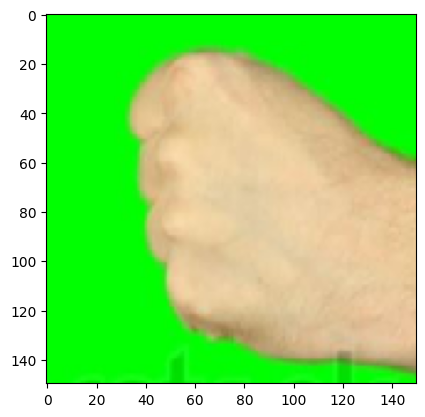

1/1 [==============================] - 0s 45ms/step
Gambar batu.JPG diprediksi sebagai: rock


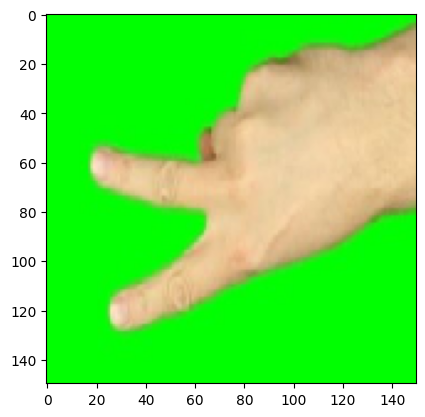

1/1 [==============================] - 0s 41ms/step
Gambar gunting.JPG diprediksi sebagai: scissors


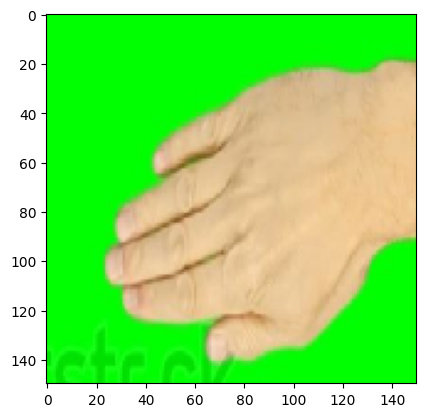

1/1 [==============================] - 0s 41ms/step
Gambar kertas.JPG diprediksi sebagai: paper


In [ ]:
def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.

    predictions = model.predict(img_array)
    classes = ['paper', 'rock', 'scissors']
    predicted_class = classes[np.argmax(predictions)]

    return predicted_class

uploaded = files.upload()

for fn in uploaded.keys():
    predicted_class = predict_uploaded_image(model, fn)
    print(f'Gambar {fn} diprediksi sebagai: {predicted_class}')